<a href="https://colab.research.google.com/github/dlarsson2000/ML4BiotechProject/blob/main/CB206V_Project_Drug_repurposing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install rdkit pandas numpy scikit-learn pycaret

In [4]:
import pandas as pd
import numpy as np
from pycaret.regression import *

In [5]:
dataset = pd.read_csv('https://raw.githubusercontent.com/dlarsson2000/ML4BiotechProject/main/grk2_fp_data.csv')
dataset.drop(columns=['chembl_id', 'canonical_smiles', 'bioactivity'], axis = 1, inplace = True)
model = setup(data = dataset, target = 'pIC50', train_size=0.8)

,Description,Value
0,Session id,3550
1,Target,pIC50
2,Target type,Regression
3,Original data shape,"(312, 1025)"
4,Transformed data shape,"(312, 1025)"
5,Transformed train set shape,"(249, 1025)"
6,Transformed test set shape,"(63, 1025)"
7,Numeric features,1024
8,Preprocess,True
9,Imputation type,simple


In [6]:
best_model = compare_models(cross_validation=False)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.5288,0.5139,0.7100,0.6610,0.1030,0.0906,0.3060
lightgbm,Light Gradient Boosting Machine,0.5206,0.5423,0.7290,0.6381,0.1053,0.0888,0.7210
rf,Random Forest Regressor,0.5395,0.6223,0.7793,0.5879,0.1126,0.0933,1.5720
gbr,Gradient Boosting Regressor,0.5665,0.6181,0.7780,0.5873,0.1117,0.0965,0.7430
knn,K Neighbors Regressor,0.5747,0.6456,0.7930,0.5728,0.1148,0.0998,0.2900
ada,AdaBoost Regressor,0.6416,0.6869,0.8234,0.5450,0.1191,0.1098,0.5650
xgboost,Extreme Gradient Boosting,0.5747,0.7047,0.8231,0.5339,0.1182,0.0977,1.2400
ridge,Ridge Regression,0.6094,0.7097,0.8311,0.5217,0.1205,0.1039,0.2190
par,Passive Aggressive Regressor,0.6302,0.7479,0.8480,0.4998,0.1198,0.1077,0.4260
huber,Huber Regressor,0.6198,0.7571,0.8560,0.4924,0.1224,0.1045,0.3340


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

BayesianRidge()

In [ ]:
print(best_model)

In [7]:
br = create_model('br')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5218,0.4382,0.6620,0.6351,0.0853,0.0789
1,0.4665,0.3791,0.6157,0.7352,0.1002,0.0881
2,0.5157,0.4678,0.6839,0.6822,0.0942,0.0830
3,0.4518,0.3063,0.5534,0.7414,0.0778,0.0766
4,0.4657,0.5146,0.7173,0.6244,0.0984,0.0728
5,0.4651,0.3758,0.6131,0.7394,0.0823,0.0712
6,0.5797,0.5960,0.7720,0.7125,0.1197,0.1043
7,0.6094,0.6749,0.8216,0.5950,0.1288,0.1184
8,0.5463,0.6022,0.7760,0.5618,0.1108,0.0924


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

BayesianRidge()


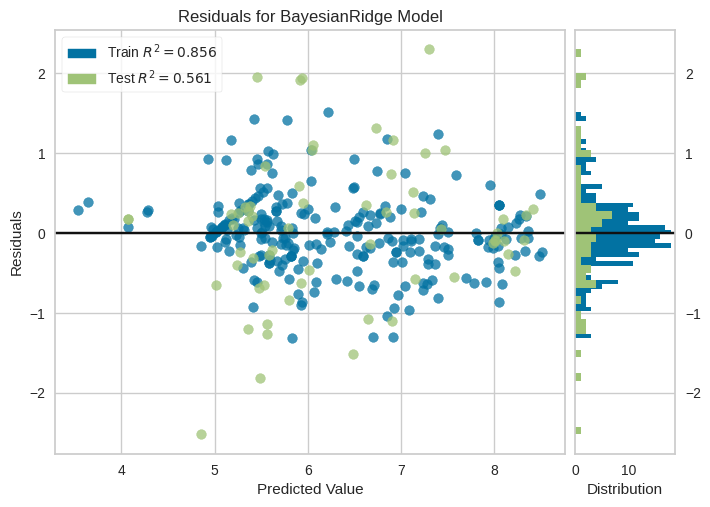

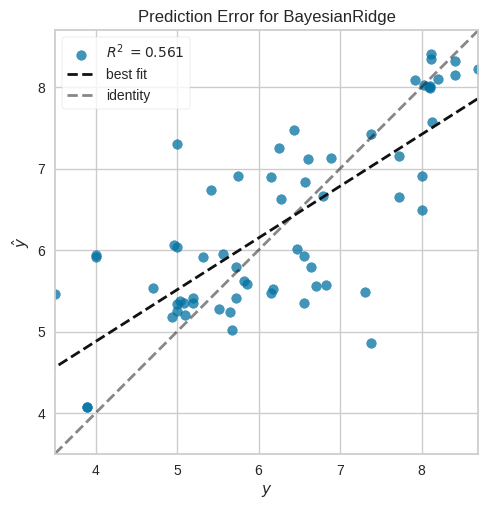

In [8]:
print(br)

plot_model(br, 'residuals')

plot_model(br, 'error')


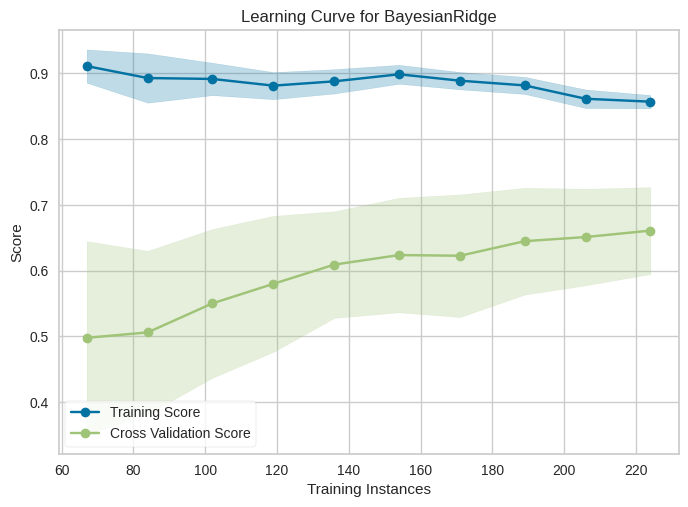

In [43]:
plot_model(br, plot = 'learning')

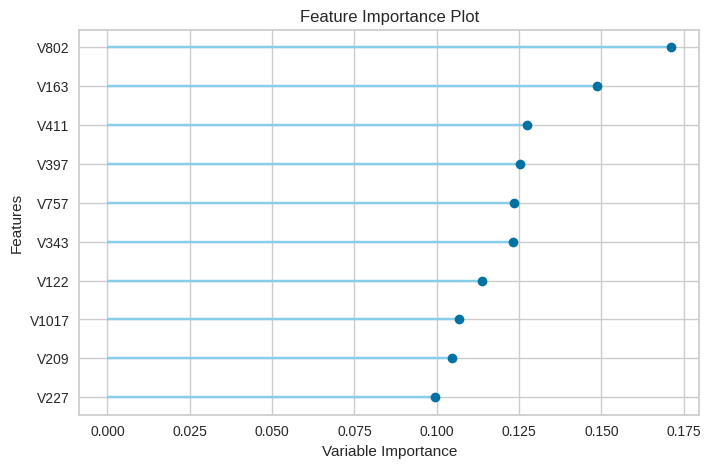

In [9]:
plot_model(br, 'feature')

In [10]:
prediction_holdout = predict_model(br)

prediction_holdout.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,0.6543,0.7889,0.8882,0.5611,0.1312,0.1145


,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,...,V1021,V1022,V1023,V1024,V1025,V1026,V1027,V1028,pIC50,prediction_label
218,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,6.431798,7.471745
27,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,6.180456,5.527809
62,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8.096910,8.005112
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6.823909,5.565821
89,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8.113509,8.411731


In [12]:
header = ["pIC50", "prediction_label"]
prediction_holdout.to_csv('holdout_prediction_data_raw.csv', index=False, columns = header)


In [13]:
! cat holdout_prediction_data_raw.csv

pIC50,prediction_label
6.4317985,7.4717449095432205
6.180456,5.527809438742703
8.09691,8.005112477116786
6.823909,5.565821057566029
8.113509,8.411730534553406
8.124939,7.570342135818393
5.7447276,6.909640197999009
6.468521,6.010634024051898
5.669586,5.019309542018409
6.552842,5.930156946681136
7.7212462,6.646795671778206
5.191789,5.406025821683595
5.860121,5.5802938926535575
8.004365,6.905373913612094
4.0,5.913798551466144
5.0,5.331973794196012
8.113509,8.343190530908537
6.60206,7.1233883582956
4.701147,5.536620016064334
5.823909,5.617054497466347
8.107905,7.9905578482990585
3.5000381,5.454731921606579
7.376751,7.424345206126755
8.0,6.486227407320363
5.0,7.300994501022758
7.309804,5.48966887855727
8.408936,8.14598115542143
4.958607,6.058767346462808
6.275724,6.624748298291283
6.79588,6.663635663144114
8.69897,8.223789694569028
5.199283,5.354345361114654
6.6382723,5.798212874903632
5.0824943,5.354345361114654
5.5686364,5.948242819352425
8.107905,8.011767878433886
5.0,5.249534616804161
5

In [25]:
# read prediction data from file
dataset2 = pd.read_csv('https://raw.githubusercontent.com/dlarsson2000/ML4BiotechProject/main/drug_phaseIV_fp_data.csv')
dataset2.head(10)


,chembl_id,canonical_smiles,max_phase,name,V5,V6,V7,V8,V9,V10,...,V1019,V1020,V1021,V1022,V1023,V1024,V1025,V1026,V1027,V1028
0,CHEMBL3833408,O=S(=O)([O-])[O-].O=S(=O)([O-])[O-].[Al+3].[Al...,4,MAGALDRATE,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL807,CC12CC3CC(C)(C1)CC(N)(C3)C2,4,MEMANTINE,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,CHEMBL30,CN/C(=N\CCSCc1nc[nH]c1C)NC#N,4,CIMETIDINE,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL1201354,CC[N+](CC)(CC)CCC(O)(c1ccccc1)C1CCCCC1,4,TRIDIHEXETHYL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL453,Cc1noc(NS(=O)(=O)c2ccc(N)cc2)c1C,4,SULFISOXAZOLE,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,CHEMBL2109882,O=[Si](O)O[Si](O)(O)O[Si](=O)O,4,TRISILICATE,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,CHEMBL3,CN1CCC[C@H]1c1cccnc1,4,NICOTINE,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,CHEMBL1201286,CC[N+](C)(CC)CCOC(=O)C(O)(c1ccccc1)C1CCCCC1,Jan-00,OXYPHENONIUM,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,CHEMBL2105755,CC(C)(NC(=O)C1=C(O)[C@@H]2Oc3c(O)ccc4c3[C@@]23...,4,NALDEMEDINE,0,0,1,0,0,1,...,1,1,1,1,0,0,0,0,0,0
9,CHEMBL1568057,CC(C)NCC(O)c1cc(O)cc(O)c1.CC(C)NCC(O)c1cc(O)cc...,4,METAPROTERENOL SULFATE,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df_new_X = dataset2.drop(columns=['name','chembl_id','canonical_smiles','max_phase'])
df_new_X.head(10)

,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,...,V1019,V1020,V1021,V1022,V1023,V1024,V1025,V1026,V1027,V1028
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,1,0,0,1,1,...,1,1,1,1,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# predict on new data
prediction_newdata = predict_model(br, data = df_new_X)
prediction_newdata.head()


,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,...,V1020,V1021,V1022,V1023,V1024,V1025,V1026,V1027,V1028,prediction_label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.617061
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,4.894142
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.739494
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.937539
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.978860


In [ ]:
evaluate_model(br)

In [39]:
#Visualize the data

#Take the names from the df_new
names = dataset2['name'].values
print(names[:5])
col_names = names.reshape(-1, 1) #making the row into a column
#print(col_names[:5])
predictions = prediction_newdata.prediction_label.values
print(predictions[:5])
col_predictions = predictions.reshape(-1, 1) #making the row into a column
#Vertically stack new arrays
pred_names = np.hstack((col_names, col_predictions))
print(pred_names[:5])

['MAGALDRATE' 'MEMANTINE' 'CIMETIDINE' 'TRIDIHEXETHYL' 'SULFISOXAZOLE']
[4.61706071 4.89414166 4.73949354 4.93753887 4.97885956]
[['MAGALDRATE' 4.6170607128764365]
 ['MEMANTINE' 4.894141662296487]
 ['CIMETIDINE' 4.739493538731511]
 ['TRIDIHEXETHYL' 4.937538872357561]
 ['SULFISOXAZOLE' 4.978859556093483]]


In [40]:
#Select the top 20 values
# Convert the second column (values) to float for sorting
pred_names[:, 1] = pred_names[:, 1].astype(float)

# Sort the array by the second column (values) in descending order
sorted_array = pred_names[pred_names[:, 1].argsort()[::-1]]

# Select the top 20 rows (top 20 values and corresponding names)
top_20 = sorted_array[:20]

# Print the result
print(top_20)

[['BEROTRALSTAT' 6.81713302997977]
 ['LIRAGLUTIDE' 6.662220316304288]
 ['EXENATIDE' 6.586100020038817]
 ['ODEVIXIBAT' 6.39518174385595]
 ['TADALAFIL' 6.261274924722919]
 ['SITAGLIPTIN' 6.214393832905497]
 ['ESZOPICLONE' 6.190826940167858]
 ['ZOPICLONE' 6.190826940167858]
 ['LINAGLIPTIN' 6.176962874150702]
 ['PRAMLINTIDE' 6.1648016532825745]
 ['FOLIC ACID' 6.149686777487578]
 ['TENELIGLIPTIN' 6.101765912623198]
 ['SILDENAFIL' 6.082730008213742]
 ['ICATIBANT' 6.0669300095603]
 ['OLODATEROL' 6.0414419432008355]
 ['IBUDILAST' 6.032627140920106]
 ['NALDEMEDINE' 6.024863113746665]
 ['PRAMIPEXOLE' 6.020972071246348]
 ['DILTIAZEM' 5.952397571950922]
 ['LINACLOTIDE' 5.947623504284003]]


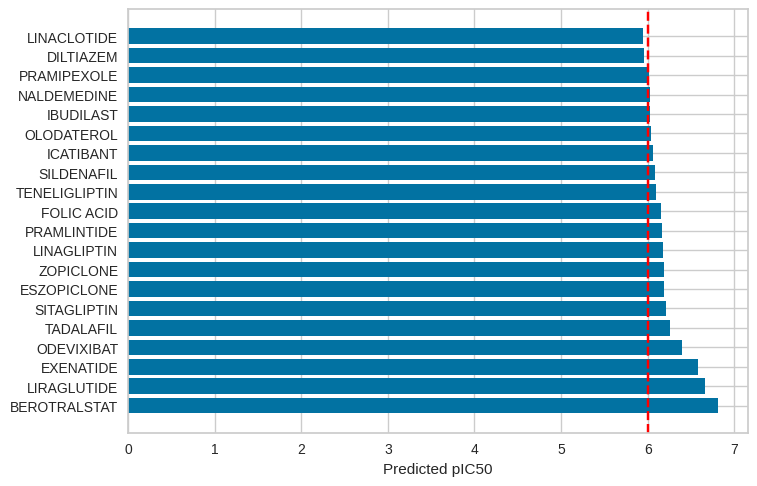

In [42]:
import matplotlib.pyplot as plt

# Select the first column for x-axis and the second column for y-axis
x_bar = top_20[:, 0]  # First column as x-axis
y_bar = top_20[:, 1]  # Second column as y-axis
threshold = 6

# Create a bar plot
plt.barh(x_bar, y_bar)

plt.xlabel('Predicted pIC50')

# Add a horizontal line for the threshold value
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')

In [ ]:
header = ["canonical_smiles", "name", "prediction_label"]
prediction_newdata.to_csv('prediction_newdata_raw.csv', index=False, columns = header)



In [ ]:
! cat prediction_newdata_raw.csv

canonical_smiles,name,prediction_label
O=S(=O)([O-])[O-].O=S(=O)([O-])[O-].[Al+3].[Al+3].[Al+3].[Al+3].[Al+3].[Mg+2].[Mg+2].[Mg+2].[Mg+2].[Mg+2].[Mg+2].[Mg+2].[Mg+2].[Mg+2].[Mg+2].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-],MAGALDRATE,4.814366902303092
CC12CC3CC(C)(C1)CC(N)(C3)C2,MEMANTINE,4.9311819035272935
CN/C(=N\CCSCc1nc[nH]c1C)NC#N,CIMETIDINE,4.514367113884458
CC[N+](CC)(CC)CCC(O)(c1ccccc1)C1CCCCC1,TRIDIHEXETHYL,5.106008983595841
Cc1noc(NS(=O)(=O)c2ccc(N)cc2)c1C,SULFISOXAZOLE,4.99268111845095
O=[Si](O)O[Si](O)(O)O[Si](=O)O,TRISILICATE,4.795767971690351
CN1CCC[C@H]1c1cccnc1,NICOTINE,5.1353274780948475
CC[N+](C)(CC)CCOC(=O)C(O)(c1ccccc1)C1CCCCC1,OXYPHENONIUM,5.4554380857806
CC(C)(NC(=O)C1=C(O)[C@@H]2Oc3c(O)ccc4c3[C@@]23CCN(CC2CC2)[C@H](C4)[C@]3(O)C1)c1nc(-c2ccccc2)no1,NALDEMEDINE,6.104515008148407
CC(C)NCC(O)c1cc(O)cc(O)c1.CC(C)NCC(O)c1cc(O)cc